In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Q = 2 #How many colors to find
EPS = 1

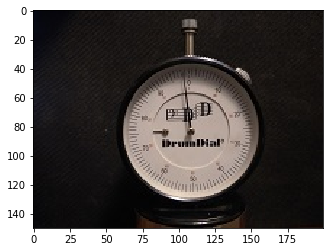

In [2]:
test_image = np.array(Image.open('test.png'))
plt.imshow(test_image)

In [3]:
s = test_image.shape
GMM_FEATURE_MATRIX = test_image.reshape(-1,3)

## Color Matching
Find the `Q` most prominent colors in the image

In [4]:
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans

model = GMM(n_components=Q)
# model = KMeans(n_clusters=Q)
model.fit(GMM_FEATURE_MATRIX)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [5]:
CLOSEST_PRIMARY_COLOR = model.predict(GMM_FEATURE_MATRIX)
c = model.means_[CLOSEST_PRIMARY_COLOR]
# c = model.cluster_centers_[CLOSEST_PRIMARY_COLOR]

### Result of Color Matching

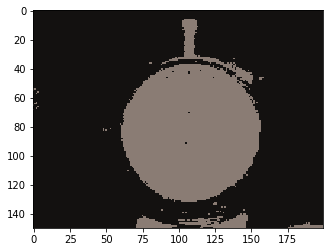

In [6]:
c = c.reshape(s)
plt.imshow(c.astype(int))

## Spacial Clustering
For each of the `Q` primary colors, use DBSCAN to find clusters of pixels of that color

18


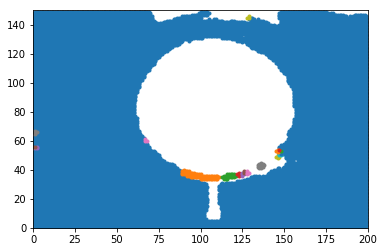

17


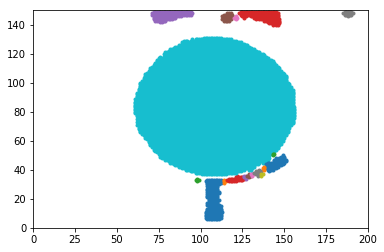

In [7]:
from sklearn.cluster import DBSCAN

d = CLOSEST_PRIMARY_COLOR.reshape(s[0],s[1])
objects = []
for i in range(Q):
    q = np.flip(np.array(np.where(d==i)).T,1)
    model_2 = DBSCAN(eps=EPS)
    r = model_2.fit_predict(q)

    
    # Find and plot all non-noise components
    print(r.max())
    for j in range(r.max()+1):
        obj = q[np.where(r==j)]
        (x0,y0),(x1,y1) = obj.min(0),obj.max(0)
        cx,cy = ( (x0+x1)//2 ,(y0+y1)//2 )
        w,h = ( x1-x0, y1-y0 )
        objects.append([cx,cy,w,h])
        plt.scatter(obj[:,0],obj[:,1],marker='.')
    
    
    plt.xlim(0,s[1])
    plt.ylim(0,s[0])
    plt.show()
    
    
    

In [8]:
def bbox(params):
    cx,cy,w,h = params
    if (w*h < 20000) and (w*h > 100):
        x0,x1 = cx-w//2, cx+w//2
        y0,y1 = cy-h//2, cy+h//2
        plt.plot([x0,x0],[y0,y1],color='r',lw=0.8)
        plt.plot([x1,x1],[y0,y1],color='r',lw=0.8)
        plt.plot([x0,x1],[y0,y0],color='r',lw=0.8)
        plt.plot([x0,x1],[y1,y1],color='r',lw=0.8)

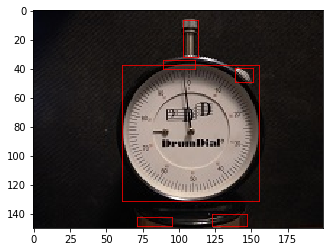

In [9]:
plt.imshow(test_image)
for i in objects:
    bbox(i)
plt.show()